Dengue fever is bad. It's real bad. Dengue is a mosquito-borne disease that occurs in tropical and sub-tropical parts of the world. In mild cases, symptoms are similar to the flu: fever, rash and muscle and joint pain. But severe cases are dangerous, and dengue fever can cause severe bleeding, low blood pressure and even death.

Because it is carried by mosquitoes, the transmission dynamics of dengue are related to climate variables such as temperature and precipitation. Although the relationship to climate is complex, a growing number of scientists argue that climate change is likely to produce distributional shifts that will have significant public health implications worldwide.

We've [launched a competition](https://www.drivendata.org/competitions/44/) to use open data to predict the occurrence of Dengue based on climatological data. Here's a first look at the data and how to get started!

As always, we begin with the sacred `import`'s of data science:

In [150]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

## A Tale of Two Cities

![](https://community.drivendata.org/uploads/default/original/1X/4c3a8204d1715b5e2ee24da78abbad1515eccd5f.png)

This dataset has two cities in it: San Juan, Puerto Rico (right) and Iquitos, Peru (left). Since we hypothesize that the spread of dengue may follow different patterns between the two, we will divide the dataset, train seperate models for each city, and then join our predictions before making our final submission.

In [153]:
# load the provided data
train_features = pd.read_csv('dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('dengue_labels_train.csv',
                           index_col=[0,1,2])

In [154]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [155]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


In [156]:
sj_train_features.head(10)
#sj_train_labels.min()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
     19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
     20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
     21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
     22              1990-05-28  0.196200  0.262200  0.251200  0.247340   
     23              1990-06-04       NaN  0.174850  0.254314  0.181743   
     24              1990-06-11  0.112900  0.092800  0.205071  0.210271   
     25              1990-06-18  0.072500  0.072500  0.151471  0.133029   
     26              1990-06-25  0.102450  0.146175  0.125571  0.123600   
     27              1990-07-02       NaN  0.121550  0.160683  0.202567   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
1990 18                         12.42             297.572857   
     19                         22.82             298.211429   
     20                         34.54             298.781429   
     21                         15.36             298.987143   
     22                          7.52             299.518571   
     23                          9.58             299.630000   
     24                          3.48             299.207143   
     25                        151.12             299.591429   
     26                         19.32             299.578571   
     27                         14.41             300.154286   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
1990 18                     297.742857                   292.414286   
     19                     298.442857                   293.951429   
     20                     298.878571                   295.434286   
     21                     299.228571                   295.310000   
     22                     299.664286                   295.821429   
     23                     299.764286                   295.851429   
     24                     299.221429                   295.865714   
     25                     299.528571                   296.531429   
     26                     299.557143                   296.378571   
     27                     300.278571                   296.651429   

                 reanalysis_max_air_temp_k  ...  \
year weekofyear                             ...   
1990 18                              299.8  ...   
     19                              300.9  ...   
     20                              300.5  ...   
     21                              301.4  ...   
     22                              301.9  ...   
     23                              302.4  ...   
     24                              301.3  ...   
     25                              300.6  ...   
     26                              302.1  ...   
     27                              302.3  ...   

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
1990 18                                    32.00   
     19                                    17.94   
     20                                    26.10   
     21                                    13.90   
     22                                    12.20   
     23                                    26.49   
     24                                    38.60   
     25                                    30.00   
     26                                    37.51   
     27                                    28.40   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                    

In [68]:
# Remove `week_start_date` string.
#sj_train_features.drop('week_start_date', axis=1, inplace=True)
#iq_train_features.drop('week_start_date', axis=1, inplace=True)

#sj_train_features.head(10)

In [157]:
sj_train_features.dtypes

week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c                       float64
station_min_temp_c                       float64
station_precip_mm   

In [158]:
#remove week_start_date and add month column

#convert object to datetime format
sj_train_features['week_start_date'] =  pd.to_datetime(sj_train_features['week_start_date'])
#add month feature
sj_train_features.loc[:, 'month'] = sj_train_features.loc[:, 'week_start_date'].dt.month
#add week feature
sj_train_features.loc[:, 'week'] = sj_train_features.loc[:, 'week_start_date'].dt.week
#remove week_start_date feature
sj_train_features.drop('week_start_date', axis=1, inplace=True)
sj_train_features.dtypes


ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c                       float64
station_min_temp_c                       float64
station_precip_mm                        float64
month               

In [159]:
sj_train_features.head(10)

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
1990 18          0.122600  0.103725  0.198483  0.177617                 12.42   
     19          0.169900  0.142175  0.162357  0.155486                 22.82   
     20          0.032250  0.172967  0.157200  0.170843                 34.54   
     21          0.128633  0.245067  0.227557  0.235886                 15.36   
     22          0.196200  0.262200  0.251200  0.247340                  7.52   
     23               NaN  0.174850  0.254314  0.181743                  9.58   
     24          0.112900  0.092800  0.205071  0.210271                  3.48   
     25          0.072500  0.072500  0.151471  0.133029                151.12   
     26          0.102450  0.146175  0.125571  0.123600                 19.32   
     27               NaN  0.121550  0.160683  0.202567                 14.41   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
1990 18                     297.572857             297.742857   
     19                     298.211429             298.442857   
     20                     298.781429             298.878571   
     21                     298.987143             299.228571   
     22                     299.518571             299.664286   
     23                     299.630000             299.764286   
     24                     299.207143             299.221429   
     25                     299.591429             299.528571   
     26                     299.578571             299.557143   
     27                     300.154286             300.278571   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
1990 18                           292.414286                      299.8   
     19                           293.951429                      300.9   
     20                           295.434286                      300.5   
     21                           295.310000                      301.4   
     22                           295.821429                      301.9   
     23                           295.851429                      302.4   
     24                           295.865714                      301.3   
     25                           296.531429                      300.6   
     26                           296.378571                      302.1   
     27                           296.651429                      302.3   

                 reanalysis_min_air_temp_k  ...  reanalysis_sat_precip_amt_mm  \
year weekofyear                             ...                                 
1990 18                              295.9  ...                         12.42   
     19                              296.4  ...                         22.82   
     20                              297.3  ...                         34.54   
     21                              297.0  ...                         15.36   
     22                              297.5  ...                          7.52   
     23                              298.1  ...                          9.58   
     24                              297.7  ...                          3.48   
     25                              298.4  ...                        151.12   
     26                              297.7  ...                         19.32   
     27                              298.7  ...                         14.41   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     

Next, let's check to see if we are missing any values in this dataset:

In [160]:
# Null check
pd.isnull(sj_train_features).any()
#sj_train_features['ndvi_ne'].isnull().sum()

ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_temp_c                        True
station_precip_mm                         True
month                                    False
week         

Text(0.5, 0, 'Time')

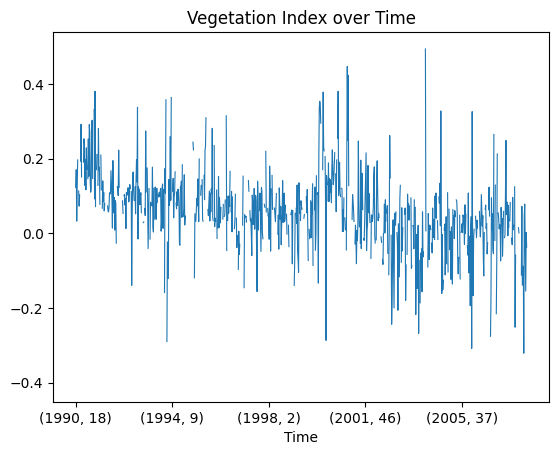

In [161]:
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

Since these are time-series, we can see the gaps where there are `NaN`s by plotting the data. Since we can't build a model without those values, we'll take a simple approach and just fill those values with the most recent value that we saw up to that point. This is probably a good part of the problem to improve your score by getting smarter.

In [162]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

pd.isnull(sj_train_features).any()


ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
month                                    False
week         

## Distribution of labels

Our target variable, `total_cases` is a non-negative integer, which means we're looking to make some **count predictions**. Standard regression techniques for this type of prediction include

1. Poisson regression
2. Negative binomial regression

Which techniqe will perform better depends on many things, but the choice between Poisson regression and negative binomial regression is pretty straightforward. Poisson regression fits according to the assumption that the mean and variance of the population distributiona are equal. When they aren't, specifically when the variance is much larger than the mean, the negative binomial approach is better. Why? It isn't magic. The negative binomial regression simply lifts the assumption that the population mean and variance are equal, allowing for a larger class of possible models. In fact, from this perspective, the Poisson distribution is but a special case of the negative binomial distribution.

Let's see how our labels are distributed!

In [163]:
#sj_train_features.head() 
#create new data
#dsj_train_features = sj_train_features[['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'station_min_temp_c']].copy()

dsj_train_features = sj_train_features
dsj_train_features


ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
1990 18          0.122600  0.103725  0.198483  0.177617                 12.42   
     19          0.169900  0.142175  0.162357  0.155486                 22.82   
     20          0.032250  0.172967  0.157200  0.170843                 34.54   
     21          0.128633  0.245067  0.227557  0.235886                 15.36   
     22          0.196200  0.262200  0.251200  0.247340                  7.52   
...                   ...       ...       ...       ...                   ...   
2008 13          0.077850 -0.039900  0.310471  0.296243                 27.19   
     14         -0.038000 -0.016833  0.119371  0.066386                  3.82   
     15         -0.155200 -0.052750  0.137757  0.141214                 16.96   
     16          0.001800 -0.052750  0.203900  0.209843                  0.00   
     17         -0.037000 -0.010367  0.077314  0.090586                  0.00   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
1990 18                     297.572857             297.742857   
     19                     298.211429             298.442857   
     20                     298.781429             298.878571   
     21                     298.987143             299.228571   
     22                     299.518571             299.664286   
...                                ...                    ...   
2008 13                     296.958571             296.957143   
     14                     298.081429             298.228571   
     15                     297.460000             297.564286   
     16                     297.630000             297.778571   
     17                     298.672857             298.692857   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
1990 18                           292.414286                      299.8   
     19                           293.951429                      300.9   
     20                           295.434286                      300.5   
     21                           295.310000                      301.4   
     22                           295.821429                      301.9   
...                                      ...                        ...   
2008 13                           292.095714                      299.7   
     14                           293.235714                      299.8   
     15                           292.732857                      299.4   
     16                           292.274286                      299.7   
     17                           294.280000                      300.9   

                 reanalysis_min_air_temp_k  ...  reanalysis_sat_precip_amt_mm  \
year weekofyear                             ...                                 
1990 18                              295.9  ...                         12.42   
     19                              296.4  ...                         22.82   
     20                              297.3  ...                         34.54   
     21                              297.0  ...                         15.36   
     22                              297.5  ...                          7.52   
...                                    ...  ...                           ...   
2008 13                              294.4  ...                         27.19   
     14                              296.5  ...                          3.82   
     15                              295.8  ...                         16.96   
     16                              295.9  ...                          0.00   
     17                              295.9  ...                          0.00   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekof

It's looking like a negative-binomial sort of day in these parts.

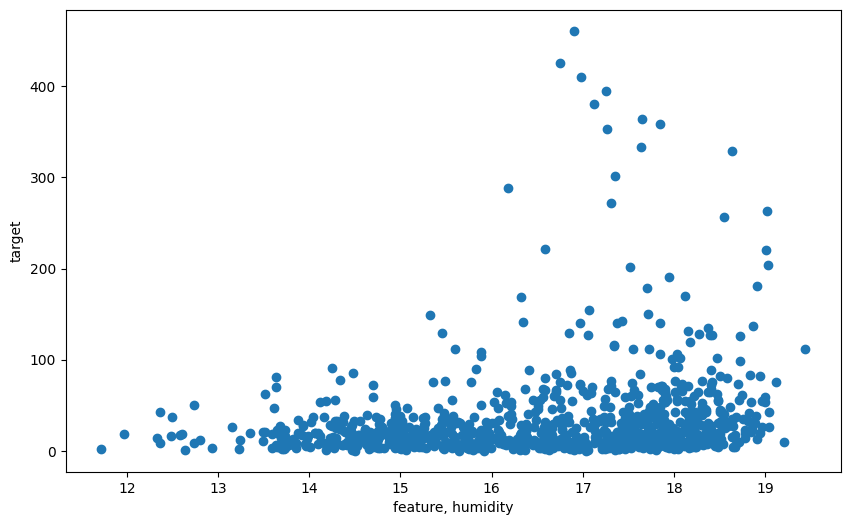

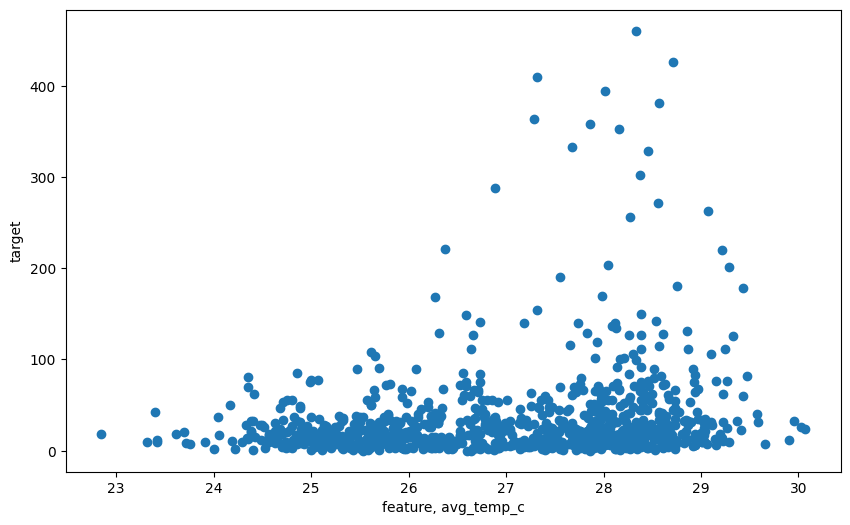

In [164]:
import matplotlib.pyplot as plt


fig1 = plt.figure(figsize=(10, 6))
plt.scatter(dsj_train_features['reanalysis_specific_humidity_g_per_kg'], sj_train_labels)
plt.xlabel('feature, humidity')
plt.ylabel('target')
plt.show()

fig2 = plt.figure(figsize=(10, 6))
plt.scatter(dsj_train_features['station_avg_temp_c'], sj_train_labels)
plt.xlabel('feature, avg_temp_c')
plt.ylabel('target')
plt.show()

In [165]:
#split the data into training and test subsets using train_test_split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dsj_train_features, sj_train_labels, random_state=10, test_size=0.2)
X_train.shape, X_test.shape

((748, 22), (188, 22))

In [166]:
#train the model using LinearRegression
from sklearn.linear_model import LinearRegression

modelLRegr = LinearRegression()
modelLRegr.fit(X_train, y_train)

LinearRegression()

In [167]:
# make predictions amd calculate metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

pred_train = modelLRegr.predict(X_train)
pred_test = modelLRegr.predict(X_test)
print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print(f'Train mse {mse_train:.2f}')
print(f'Test mse {mse_test:.2f}')

Train R2 0.19
Test R2 0.14
Train mse 2186.16
Test mse 2041.20


In [168]:
#train the model using DecisionTree
from sklearn.tree import DecisionTreeRegressor

modelDTree = DecisionTreeRegressor(random_state=1, max_depth=7, min_samples_leaf=8, max_leaf_nodes=None)
modelDTree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=8, random_state=1)

In [169]:
# make predictions amd calculate metrics
pred_train = modelDTree.predict(X_train)
pred_test = modelDTree.predict(X_test)
print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print(f'Train mse {mse_train:.2f}')
print(f'Test mse {mse_test:.2f}')

Train R2 0.69
Test R2 0.63
Train mse 851.31
Test mse 871.15


In [170]:
# check wheather we need scaling
X_train.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,month,week
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,...,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,0.058689,0.068064,0.176084,0.165478,36.657032,299.165519,299.278514,295.116087,301.398797,297.301604,...,36.657032,16.561383,2.516654,26.999007,6.749962,31.599599,22.598262,27.799064,6.447861,26.609626
std,0.106657,0.092038,0.057667,0.055962,46.824643,1.240477,1.222361,1.589110,1.256261,1.313975,...,46.824643,1.576505,0.494756,1.417565,0.843023,1.722366,1.504214,31.015868,3.405438,14.852420
min,-0.406250,-0.309600,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,298.000000,292.600000,...,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000,1.000000,1.000000
25%,0.006100,0.015705,0.138034,0.129778,0.000000,298.203929,298.312500,293.823571,300.400000,296.300000,...,0.000000,15.216786,2.157143,25.842857,6.185714,30.600000,21.700000,7.175000,4.000000,14.000000
50%,0.056725,0.068925,0.175492,0.166057,20.265000,299.246429,299.375000,295.489286,301.500000,297.500000,...,20.265000,16.875000,2.471429,27.228571,6.757143,31.700000,22.800000,18.000000,6.000000,26.000000
75%,0.110642,0.113762,0.208489,0.198421,53.572500,300.134286,300.228571,296.426786,302.400000,298.400000,...,53.572500,17.871786,2.785714,28.175000,7.289286,32.800000,23.900000,36.600000,9.000000,39.000000
max,0.493400,0.437100,0.393129,0.381420,390.600000,302.200000,302.164286,297.795714,304.300000,299.900000,...,390.600000,19.440000,4.428571,30.071429,9.914286,35.600000,25.600000,305.900000,12.000000,53.000000


In [197]:
#train the model using RandomForest
from sklearn.ensemble import RandomForestRegressor

modelRForest = RandomForestRegressor()
#modelRForest = RandomForestRegressor(max_depth=10, n_estimators=250, random_state=1)
modelRForest.fit(X_train, y_train)

RandomForestRegressor()

In [198]:
# make predictions amd calculate metrics
pred_train = modelRForest.predict(X_train)
pred_test = modelRForest.predict(X_test)
print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)

print(f'Train mae {mae_train:.2f}')
print(f'Test mae {mae_test:.2f}')

Train R2 0.93
Test R2 0.72
Train mae 8.19
Test mae 17.55


In [199]:
#train the model using GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

modelGBoost = GradientBoostingRegressor()
#modelGBoost = GradientBoostingRegressor(max_depth=3, n_estimators=100, random_state=2, learning_rate=0.1)

modelGBoost.fit(X_train, y_train)

GradientBoostingRegressor()

In [200]:
# make predictions amd calculate metrics
pred_train = modelGBoost.predict(X_train)
pred_test = modelGBoost.predict(X_test)
print(f'Train R2 {r2_score(y_train, pred_train):.2f}')
print(f'Test R2 {r2_score(y_test, pred_test):.2f}')

mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_test)

print(f'Train mae {mae_train:.2f}')
print(f'Test mae {mae_test:.2f}')

Train R2 0.88
Test R2 0.70
Train mae 12.38
Test mae 18.97


In [201]:
# load data and set index to city, year, weekofyear
dffull = pd.read_csv('dengue_features_test.csv', index_col=[0, 1, 2])

# separate san juan and iquitos
sj_test = dffull.loc['sj']
#iq = df.loc['iq']

#remove week_start_date and add month column
#convert object to datetime format
sj_test['week_start_date'] =  pd.to_datetime(sj_test['week_start_date'])
#add month feature
sj_test.loc[:, 'month'] = sj_test.loc[:, 'week_start_date'].dt.month
#add week feature
sj_test.loc[:, 'week'] = sj_test.loc[:, 'week_start_date'].dt.week
#remove week_start_date feature
sj_test.drop('week_start_date', axis=1, inplace=True)
#sj_test.dtypes


#clean from nulls 
sj_test.fillna(method='ffill', inplace=True)
pd.isnull(sj_test).any()



#make predictions
sj_predictions = modelRForest.predict(sj_test).astype(int)

np.save('save_sj_predictions.npy', sj_predictions) # save
#new_num_arr = np.load('data.npy') # load

print('San Juan')
print('sj_predictions: ', sj_predictions.shape)


San Juan
sj_predictions:  (260,)


Since this is a timeseries model, we'll use a strict-future holdout set when we are splitting our train set and our test set. We'll keep around three quarters of the original data for training and use the rest to test. We'll do this separately for our San Juan model and for our Iquitos model.

In [149]:
sj_predictions[0:10]



array([ 6,  6,  9, 15, 12, 12,  7, 21, 13, 16])

## Training time

This is where we start getting down to business. As we noted above, we'll train a NegativeBinomial model, which is often used for count data where the mean and the variance are very different. In this function we have three steps. The first is to specify the functional form 

## Reflecting on our performance

These graphs can actually tell us a lot about where our model is going wrong and give us some good hints about where investments will improve the model performance. For example, we see that our model in blue does track the seasonality of Dengue cases. However, the timing of the seasonality of our predictions has a mismatch with the actual results. One potential reason for this is that our features don't look far enough into the past--that is to say, we are asking to predict cases at the same time as we are measuring percipitation. Because dengue is misquito born, and the misquito lifecycle depends on water, we need to take both the life of a misquito and the time between infection and symptoms into account when modeling dengue. This is a critical avenue to explore when improving this model.

The other important error is that our predictions are relatively consistent--we miss the spikes that are large outbreaks. One reason is that we don't take into account the contagiousness of dengue. A possible way to account for this is to build a model that progressively predicts a new value while taking into account the previous prediction. By training on the dengue outbreaks and then using the predicted number of patients in the week before, we can start to model this time dependence that the current model misses.

So, we know we're not going to win this thing, but let's submit the model anyway!

![](https://community.drivendata.org/uploads/default/original/1X/7af03e4997e8487057a77f9022691b9e9cb525f7.png)

Alright, it's a start! To build your own model you can grab this notebook [from our benchmarks repo](https://github.com/drivendata/benchmarks).

Good luck, and enjoy!